In [1]:
# !pip install textblob

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_colwidth', None) #prevent truncated view of dataframe
pd.set_option('display.max_rows', None) #show all rows

In [4]:
pd.options.display.max_rows = None

In [5]:
df = pd.read_csv("clean_all_job_data.csv")

In [6]:
df = df.drop(df.columns[0:2], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   keyword                            2555 non-null   object 
 1   link                               2555 non-null   object 
 2   job_id                             2555 non-null   int64  
 3   job_title                          2555 non-null   object 
 4   job_expired                        2555 non-null   bool   
 5   job_confidential                   2555 non-null   bool   
 6   job_salary_min                     578 non-null    float64
 7   job_salary_max                     578 non-null    float64
 8   job_salary_currency                2423 non-null   object 
 9   company                            2539 non-null   object 
 10  job_post_date                      2555 non-null   object 
 11  job_internship                     2555 non-null   bool 

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
vectorizer = TfidfVectorizer(ngram_range=(1,3)) #unigram to trigram
#Tokenize and build vocabulary
X = vectorizer.fit_transform(df.clean_job_desc)
y = df.keyword

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 
print("train data shape: ",X_train.shape)
print("test data shape: ",X_test.shape)

train data shape:  (2044, 455591)
test data shape:  (511, 455591)


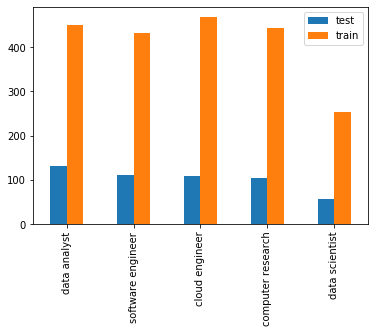

In [11]:
bar_df = pd.merge(y_test.value_counts(),y_train.value_counts(),left_index=True, right_index=True)
bar_df = bar_df.rename(columns={"keyword_x": "test", "keyword_y": "train"})

bar_df.plot.bar()

In [12]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

In [13]:
print("Accuracy score is: ",accuracy_score(y_test, y_predicted))
print("Classes: (to help read Confusion Matrix)\n", clf.classes_)
print("Confusion Matrix: ")

print(confusion_matrix(y_test, y_predicted))
print("Classification Report: ")
print(classification_report(y_test, y_predicted))

Accuracy score is:  0.821917808219178
Classes: (to help read Confusion Matrix)
 ['cloud engineer' 'computer research' 'data analyst' 'data scientist'
 'software engineer']
Confusion Matrix: 
[[106   0   1   0   2]
 [  0  96   3   0   6]
 [  9   0 117   0   5]
 [  3  17  19  15   2]
 [ 19   1   4   0  86]]
Classification Report: 
                   precision    recall  f1-score   support

   cloud engineer       0.77      0.97      0.86       109
computer research       0.84      0.91      0.88       105
     data analyst       0.81      0.89      0.85       131
   data scientist       1.00      0.27      0.42        56
software engineer       0.85      0.78      0.82       110

         accuracy                           0.82       511
        macro avg       0.86      0.77      0.77       511
     weighted avg       0.84      0.82      0.80       511



In [14]:
print(clf.coef_)
print(clf.coef_.shape)

[[-13.05368284 -13.05368284 -13.05368284 ... -13.05368284 -13.05368284
  -13.05368284]
 [-13.04561327 -13.04561327 -13.04561327 ... -13.04561327 -13.04561327
  -13.04561327]
 [-13.05020236 -13.05020236 -13.05020236 ... -13.05020236 -13.05020236
  -13.05020236]
 [-13.04076826 -13.04076826 -13.04076826 ... -13.04076826 -13.04076826
  -13.04076826]
 [-12.97899803 -12.97899803 -12.97899803 ... -12.95563253 -12.95563253
  -12.95563253]]
(5, 455591)


C:\Users\teo-e\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [15]:
from textblob import TextBlob
technical_skills = ['data', 'css', 'rest', 'tableau', 'docker', 'bigquery', 'c++', 'nltk', 'autodesk', 'scipy', 
                    'documentation', 'spring', 'mongdb', 'vue', 'jira', 'salesforce', 'plotly', 'visualisation', 
                    'optimization', 'net', 'thinking', 'gcp', 'tailwind', 'quantum', 'mongodb', 'agile', 'tensorflow',
                    'database', 'asp', 'sqlalchemy', 'io', 'spark', 'html5', 'blockchain', 'c', 'django', 'lambda',
                    'git', 'web development', 'cognos', 'json', 'analysis', 'rabbitmq', 'excel', 'pos', 'restful', 
                    'angularjs', 'numpy', 'passport', 'visual basic', 'erp', 'pytorch', 'cordova', 'nuxt', 'scraping',
                    'jenkins', 'java', 'script', 'bi', 'qliksense', 'scala', 'r', 'firebase', 'mobile', 'html', 'abap',
                    'splunk', 'php', 'javase', 'express', 'oop', 'javascript', 'wordpress', 'amqp', 'figma', 'nosql', 
                    'sas enterprise', 'b', 'mvc', 'linux', 'services aws', 'android', 'vba', 'nodejs', 'springboot',
                    'phpmyadmin', 'hadoop', 'ssis', 'angular', 'typescript', 'pandas', 'api', 'ai', 'sas', 'kong', 
                    'ruby', 'microservices', 'exploratory', 'lightroom', 'consulting', 'c#', 'mysql', 'postgresql', 
                    'customer service', 'aws', 'signavio', 'flask', 'bootstrap', 'flutter', 'tibco', 'reactjs', 
                    'react', 'vuejs', 'devops', 'postman', 'adobe', 'kotlin', 'dbms', 'keras', 'cypress', 'scikit', 
                    'trello', 'sql', 'spring boot', 'matplotlib', 'spotfire', 'dotnet', 'bash', 'python', 'asp.net', 
                    'power bi', 'ux', 'rails', 'wamp', 'gis', 'swift', 'seo', 'axure', 'solidity', 'node', 'ui', 
                    'modeling', 'github', 'laravel', 'soql', 'scikit-learn', 'js', 'fastai', 'autocad', 'apache', 
                    'jupyter', 'react js', 'nlp', 'ubuntu']
feature_array = vectorizer.get_feature_names()
# number of overall model features
features_numbers = len(feature_array)
## max sorted features number
n_max = int(features_numbers * 0.1)

##initialize output dataframe
output = pd.DataFrame()
for i in range(0,len(clf.classes_)):
    print("\n****" ,clf.classes_[i],"****\n")
    class_prob_indices_sorted = clf.feature_log_prob_[i, :].argsort()[::-1]
    raw_skills = np.take(feature_array, class_prob_indices_sorted[:n_max])
    print("list of unprocessed skills :")
    [print(x, end=", ") for x in raw_skills[:20]] 
    print()
    print("#"*20)
    
    ## Extract technical skills
    top_technical_skills= list(set(technical_skills).intersection(raw_skills))
    #print("Top technical skills",top_technical_skills)
    print("list of programming language")
    [print(x, end=", ") for x in top_technical_skills[:20]]
    print()
    print("#"*20)
    
    ## Extract adjectives
    
    # Delete technical skills from raw skills list
    #At this steps, raw skills list doesnt contain the technical skills
    raw_skills = [x for x in raw_skills if x not in top_technical_skills]
    raw_skills = list(set(raw_skills) - set(top_technical_skills))

    # transform list to string
    txt = " ".join(raw_skills)
    blob = TextBlob(txt)
    #top 6 adjective
    top_adjectives = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("JJ")]
    print("Top adjectives: ")
    [print(x, end=", ") for x in top_adjectives[:20]]
    print()
    print("#"*20)
    print()
    
    output = output.append({'job_title':clf.classes_[i],
                        'raw_skills' : raw_skills,
                        'technical_skills':top_technical_skills,
                        'soft_skills':top_adjectives },
                       ignore_index=True)


**** cloud engineer ****

list of unprocessed skills :
cloud, infrastructure, security, service, technology, system, solution, aws, team, devops, operation, amp, application, management, business, support, environment, azure, tool, technical, 
####################
list of programming language
devops, power bi, aws, springboot, ux, node, github, gcp, bi, io, kong, django, data, api, thinking, mobile, rest, agile, nodejs, sql, 
####################
Top adjectives: 
different, artifactory, technical, least, infrastructure, extend, automate, app, high, strictest, familiarity, relational, solid, responsible, continued, essential, exhaustive, proper, portal, technical, 
####################


**** computer research ****

list of unprocessed skills :
research, computer, learning, engineering, science, computer science, machine, machine learning, ai, position, invite application, application position, invite, invite application position, project, candidate, science engineering, system, data, 

In [16]:
TextBlob("description position suitable individual constant learner problem solver multi taskers candidate thrive fast paced environment step face challenge able deliver result welcome apply looking candidate interested implementation operation cloud infrastructure responsible implementing maintaining cloud infrastructure aws azure google cloud xtremax customer provide support customer issue cloud infrastructure closely security monitor privacy develop incident response procedure least year hand managing network infrastructure managed service aws azure gcp least one cloud certification level higher e g aws certified sysops administrator associate microsoft certified azure administrator associate google cloud certified professional data engineer least one operating system linux window understanding networking preferable tcp ip ip address http dns basic security concept user management o hardening communication scripting skill powershell bash python nodejs etc extra value submitting resume cv consent agree allow information provided used processed behalf xtremax pte ltd purpose registration interest current future employment u processing application employment personal data held u relating application kept strictly confidential accordance pdpa may also refer privacy policy detail http www xtremax com privacy policy inform consent providing necessary data required u process application potentially able offer").pos_tags

[('description', 'NN'),
 ('position', 'NN'),
 ('suitable', 'JJ'),
 ('individual', 'JJ'),
 ('constant', 'JJ'),
 ('learner', 'NN'),
 ('problem', 'NN'),
 ('solver', 'NN'),
 ('multi', 'NN'),
 ('taskers', 'NNS'),
 ('candidate', 'VBP'),
 ('thrive', 'JJ'),
 ('fast', 'NN'),
 ('paced', 'VBD'),
 ('environment', 'NN'),
 ('step', 'NN'),
 ('face', 'NN'),
 ('challenge', 'VBP'),
 ('able', 'JJ'),
 ('deliver', 'NN'),
 ('result', 'NN'),
 ('welcome', 'VBP'),
 ('apply', 'NN'),
 ('looking', 'VBG'),
 ('candidate', 'NN'),
 ('interested', 'JJ'),
 ('implementation', 'NN'),
 ('operation', 'NN'),
 ('cloud', 'JJ'),
 ('infrastructure', 'NN'),
 ('responsible', 'JJ'),
 ('implementing', 'VBG'),
 ('maintaining', 'JJ'),
 ('cloud', 'JJ'),
 ('infrastructure', 'NN'),
 ('aws', 'VBZ'),
 ('azure', 'JJ'),
 ('google', 'NN'),
 ('cloud', 'NN'),
 ('xtremax', 'NNP'),
 ('customer', 'NN'),
 ('provide', 'NN'),
 ('support', 'NN'),
 ('customer', 'NN'),
 ('issue', 'NN'),
 ('cloud', 'NN'),
 ('infrastructure', 'NN'),
 ('closely', 'RB'),
 

In [17]:
print(output.T)

In [18]:
output

,job_title,raw_skills,technical_skills,soft_skills
0,cloud engineer,"[team different, sg tech stack, center pop, strategy roadmap wog, revenue research, data protection matter, jenkins artifactory, bank year enterprise, qualification master bachelor, using tool apache, leverage technical sale, manage government, expertise least, intellectually, infrastructure maintain extend, tenant, required specification, service identity, mpls, disability, organization business model, building monitoring around, perform automate, gateway app, success member, architecture includes, high service, closing date posting, strictest confidence geetali, gcp azure aws, familiarity relational, solid apache, sre team responsible, continued secure operation, xigua bytedance, service including, listed essential exhaustive, expectation within, practice throughout cib, network engineer gcp, area expertise, article blog guild, system baseline proper, network operation experience, portal year technical, security risk assessment, ceh, using enterprise code, infrastructure iac, ea license wang, smu edu sg, min bachelor, response plan devops, application happy support, cloud using cli, feature workflow, scale enterprise, level infrastructure, drill bachelor, way fastest growing, resume bank future, recovery measure, administration cloud, effective service, live use, hand container, package, available www persolkelly, interested wish apply, hadoop ecosystem, remote onsite, troubleshooting system using, customer issue, architect security, recovery backup data, scalable elastic, team understanding technical, service desk within, known gandalf clear, estimated, manager pmo, microsoft amp, linkedin, running cloud, ansible terraform, technical premise data, including troubleshooting, family leave, terraform ansible, comfortably verbally writing, fleet, potential shape direction, deploy release management, extracting data perform, team environment pro, vital success, responsible developing cloud, cause analysis tool, external internal, operating innovative, ...]","[devops, power bi, aws, springboot, ux, node, github, gcp, bi, io, kong, django, data, api, thinking, mobile, rest, agile, nodejs, sql, apache, microservices, erp, net, script, nosql, linux, vue, swift, ai, postgresql, web development, documentation, autocad, postman, firebase, autodesk, mysql, angular, mongodb, react, express, java, typescript, javascript, ubuntu, lambda, spring boot, tableau, modeling, docker, blockchain, python, ruby, html, jira, optimization, spring, hadoop, php, splunk, numpy, salesforce, spark, bash, rabbitmq, jenkins, analysis, bootstrap, customer service, json, restful, consulting, android, kotlin, git, database, mvc, scala]","[different, artifactory, technical, least, infrastructure, extend, automate, app, high, strictest, familiarity, relational, solid, responsible, continued, essential, exhaustive, proper, portal, technical, enterprise, iac, happy, cli, scale, bachelor, fastest, resume, future, effective, available, interested, wish, scalable, elastic, technical, clear, ansible, technical, ansible, fleet, potential, pro, vital, responsible, cloud, external, internal, innovative, infra, seek, collaborative, corrective, liaise, english, lambda, great, logical, competitive, jpmorgan, request, small, azure, oriented, outcome, prometuous, giant, professional, microsoft, common, empower, usa, united, confidential, dev, efficient, responsible, aws, reusable, anticipated, various, fundamental, deployment, template, linux, device, complete, comprehensive, mandatory, agile, overall, technical, many, different, responsible, independent, upgrade, audio, corporate, institutional, ...]"
1,computer research,"[deliverable master, trial expenditure timely, centre frontier ai, fulfilled ensure informed, hospital outcome phenotypic, improve transparency reliability, learner well, achieve better, familiar least one, measurement provide, machine translation language, spectrum degree, research child, 

In [19]:
output[output['job_title']=='software engineer']

,job_title,raw_skills,technical_skills,soft_skills
4,software engineer,"[fewer day, team different, framework feederjs, oracle postgresql, control decision, system specification order, package hybrid working, data protection matter, request bug fix, xml jquery multiple, globalfoundries owned mubadala, system meet mission, customer issue implement, application according user, package please submit, chinese speaking, simulation demonstrate matlab, derive product level, engineer quickly, perform fundamental server, device working linux, issue collaborate team, ip lte wi, service peripheral label, offer attractive remuneration, opportunity client exciting, azure linux platform, application adopt, software testing static, design implementation application, product proposing software, emerging standard software, may considered senior, framework core code, disability, blockchain data analytics, git deployment implementing, product firm, cycle solid background, software using net, fi product functional, implementation cyber security, forward detailed, strictest confidence geetali, familiarity relational, leave year personal, resolve rollout, xigua bytedance, indicate information, working efficiently communicating, model core banking, english responsible hardworking, assessing code software, system renewal business, matlab simulink, house external familiar, system testing ensure, technical documentation year, destination, opportunity well, ea license wang, seeker disability, troubleshoot debug, token amp, difference organisation role, functional design, app functionality, closely web designer, expected amp, software engineer techstack, jonathan ng newbridgealliance, science engineering management, project using rest, manufacturing environment erp, eager willing, existing program per, resume bank future, rollout issue, plus posse, package, available www persolkelly, interested wish apply, digital signal, cycle preferred embedded, implement microservices meet, engineering quality efficiency, provide software application, blueprint solution, hq singapore, unix like operating, development delivery world, customer issue, risk tolerance, escalation tracking resolution, schematic able debug, software testing validation, po kiosk preparation, service completed, system web platform, clinical community, ...]","[ssis, devops, power bi, aws, sas, springboot, ux, node, ui, github, gcp, excel, oop, bi, io, mongdb, kong, django, data, api, thinking, cordova, dotnet, mobile, rest, agile, nodejs, sql, apache, microservices, erp, abap, flask, net, script, nosql, linux, vue, swift, ai, postgresql, adobe, angularjs, web development, documentation, postman, tibco, wordpress, reactjs, visual basic, exploratory, mysql, angular, mongodb, react, express, java, typescript, javascript, lambda, ubuntu, spring boot, tableau, docker, blockchain, python, ruby, html, asp, jira, optimization, spring, hadoop, php, laravel, spark, bash, rabbitmq, trello, jenkins, analysis, bootstrap, restful, json, customer service, consulting, android, kotlin, git, database, mvc, scala]","[fewer, different, hybrid, mubadala, user, chinese, derive, engineer, fundamental, linux, peripheral, attractive, static, standard, senior, git, deployment, solid, net, fi, functional, strictest, personal, english, responsible, familiar, technical, license, functional, web, amp, ng, rest, willing, posse, available, interested, wish, digital, signal, embedded, unix, schematic, able, web, clinical, latest, net, fleet, asp, net, fisher, ea, dynamic, various, nexus, deployment, flash, micro, statistical, amp, nice, excellent, scalable, efficient, istio, user, professional, weblogic, innovative, able, familiar, automate, manual, basic, sql, industrial, able, future, net, native, flatter, responsive, involved, developmental, reusable, component, multinational, modular, programming, senior, architect, multicultural, fresh, mandatory, overall, technical, interested, vibrant, preferable, ...]"


In [20]:
skills_df = df[['keyword','clean_job_title','clean_job_desc']]

In [21]:
from nltk import ngrams

def match_skills(dataframe):
    words = dataframe.clean_job_desc.split(" ")
    tokens = set(words)
    bigram = set([n[0] + " " + n[1] for n in ngrams(words,2)])
    technical_skills = output[output.job_title==dataframe.keyword]['technical_skills'].tolist()[0]
    dataframe['technical_skills'] = list(set(technical_skills).intersection(tokens)) + list(set(technical_skills).intersection(bigram))
    
    soft_skills = output[output.job_title==dataframe.keyword]['soft_skills'].tolist()[0]
    dataframe['soft_skills'] = list(set(soft_skills).intersection(tokens)) + list(set(soft_skills).intersection(bigram))
    
#     raw_skills = output[output.job_title==dataframe.keyword]['raw_skills'].tolist()[0]
#     dataframe['raw_skills'] = list(set(raw_skills).intersection(tokens) - set(technical_skills) - set(soft_skills))
    
    return dataframe

In [22]:
skills_df = skills_df.apply(match_skills, axis=1)

In [23]:
skills_df[skills_df.keyword=="data scientist"].head(10)

,keyword,clean_job_title,clean_job_desc,technical_skills,soft_skills
1705,data scientist,Machine Learning Engineer,xiaomi corporation founded april listed main board hong kong stock exchange july hk xiaomi consumer electronics smart manufacturing smartphones smart hardware connected iot platform core embracing vision make friend user coolest user heart xiaomi continuously pursues innovation high quality user operational efficiency relentlessly build amazing product honest price let everyone world enjoy better life innovative technology xiaomi one world leading smartphone company market share term smartphone shipment ranked globally second quarter description based large number user behavior use data mining machine learning algorithm model user interest preference improve user user commercial value advertising product click rate estimation conversion rate estimation closed loop advertising ecology construction research advertising strategy mechanism optimization advertising conversion monetization effect innovative application model deep neural network reinforcement learning transfer learning multi task learning research industry leading algorithm requirement familiar commonly used deep learning algorithm wide amp deep deepfm transformer coaction etc traditional machine learning algorithm gbdt lr ltr etc familiar commonly used feature engineering method big data framework spark hadoop hive hbase familiar two programming language python scala java c familiar common distributed deep learning framework tensorflow paddlepaddle pytorch caffe sense responsibility ability learn quickly communication technological innovation spirit willingness accept challenge able withstand pressure,"[kong, spark, java, optimization, data, hadoop, pytorch, tensorflow, python, scala]","[manufacturing, leading, description, april, programming, commercial, click, user, hive, hardware, high, enjoy, iot, able, communication, technological, july, wide, use, spark, better, platform, java, learn, hbase, improve, big, operational, listed, traditional, hong, second, main, application, model, requirement, core, etc, multi, algorithm, closed, common, quality, amp, kong, distributed, smart, reinforcement, framework, data, willingness, feature, innovative, tensorflow, make, task, build, python, learning, vision, method, familiar, optimization, behavior, neural, hadoop, connected, large, deep, loop, used, scala]"
1706,data scientist,Senior Associate Associate Data Scientist,description senior associate associate data scientist nlp analytics center excellence group transformation wd business function db transformation group focus nurturing culture world best digital bank euromoney amp best bank world euromoney approach combination science art immerse stakeholder world design thinking experimentation drive rigorous creativity along pipeline build connection corporate entrepreneur start ups cross disciplinary team focused invention solution radically improve way people live play passionate committed make banking joyful lot fun purpose deliver data science analysis support business decision various business support unit bank develop advanced nlp component included innovative application creating prototype develop solution based advanced analytics leveraging internal data source external data asset build machine learning solution solve various business question perform ad hoc exploratory statistic data mining task diverse datasets small scale big data select feature build optimize classifier using machine learning technique perform data wrangling feature engineering data mining using state art method extend data third party source information needed enhance data collection procedure include information relevant building analytic system process cleanse verify integrity data used analysis carry ad hoc analysis present result clear manner build nlp solution build end end nlp solution prototype business problem perform data cleansing build data pipeline develop traditional n

In [24]:
skills_df.to_csv("job_with_skills.csv")

### exhaustive list of technical skills (merge with jerome)
### fix n_grams
### clean data more for soft skills (maybe map with POS)
### add more non-technical jobs
### finalise insights